#### Handling Missing Values Through Various Techniques

#### Kaggle (Titanic Dataset)

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [9]:
import numpy as np

df["Cabin_null"] = np.where(df["Cabin"].isnull(),1,0)

# Fing the percantage of null values
df["Cabin_null"].mean()

0.7710437710437711

In [11]:
df["Cabin_null"]

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: Cabin_null, Length: 891, dtype: int32

In [12]:
df["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [17]:
df["Cabin"].isna().sum()

687

In [29]:
# Percentage of miising values in cabin
687/len(df)


0.7710437710437711

In [28]:
df_corr = df.corr()
df_corr["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Cabin_null    -0.316912
Pclass        -0.338481
Name: Survived, dtype: float64

In [34]:
df.groupby(["Survived"])["Cabin_null"].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

### All technique of Handling Missing values

#### 1) Mean, Meadian, Mode Replacement
#### 2) Random Sample Imputation
#### 3) Capturing NAN values with a new feature
#### 4) End of Distribution
#### 5) Arbitrary Imputation
#### 7) Frequent Categories Imputation


### When Should we apply mean,meadian,mode ?
#### -> Mean/ Median/ Mode imputation has the assumption that the data is missing completely at random (MCAR).
####    We solve this by replacing the NAN with the most frequent occurance of the variables

In [35]:
df = pd.read_csv("train.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [36]:
### Let see the percantage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [39]:
def impute_nan(df,variable,m):
    df[variable + "_median"] = df[variable].fillna(median)

In [41]:
median = df["Age"].median()
median

28.0

In [42]:
impute_nan(df,"Age",median)

In [43]:
df

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


In [44]:
df["Age"].std()

14.526497332334044

In [45]:
df["Age_median"].std()

13.019696550973194

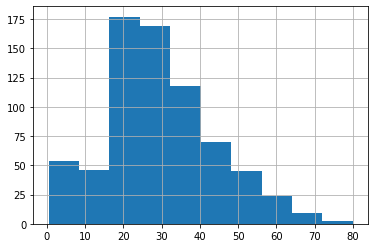

In [46]:
import matplotlib.pyplot as plt

df["Age"].hist();

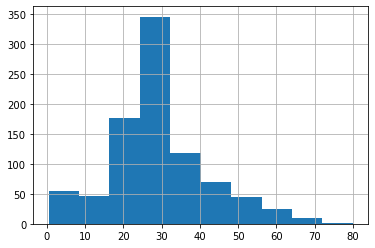

In [48]:
df["Age_median"].hist();

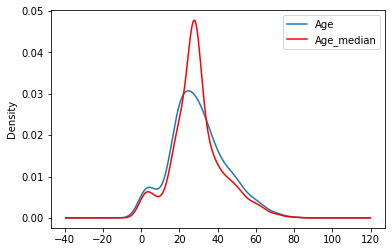

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)
df["Age"].plot(kind='kde',ax=ax)
df["Age_median"].plot(kind="kde",ax=ax,color="red")
plt.legend(["Age","Age_median"]);

# Advantages of Mean/Median/Mode
1. Easy to Implement
2. Faster way to obtain the complete dataset

# Disadvantages of Mean/Median/Mode
1. Change or Distortion in the original variance
2. Impacts Correlations

## Feature Engineering 2(Missing Values)

#### 2. Random Sample Imputation

Aim : Random Sample Imputation consist of taking random observation from the dataset and we use ths observation to replace the nan values

When should It be used ?
-> It assumes that the data is missing completely at random(MCAR

In [ ]:
import pandas as pd
 
df = pd.read_csv("train.csv",usecols=["Age","Fare","Survived"])

In [56]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [70]:
df["Age"].dropna().sample()

271    25.0
Name: Age, dtype: float64

In [57]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [59]:
df.isna().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [77]:
df["Age"].dropna().sample(df["Age"].isnull().sum(),random_state=42)

149    42.0
407     3.0
53     29.0
369    24.0
818    43.0
       ... 
38     18.0
247    24.0
445     4.0
323    22.0
714    52.0
Name: Age, Length: 177, dtype: float64

In [81]:
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    # It will fill with the random values 
    random_sample = df[variable].dropna().sample(df["Age"].isnull().sum(),random_state=42)
    ## Pandas need to have same index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+"_random"] = random_sample

In [79]:
median = df["Age"].median()
median

28.0

In [82]:
impute_nan(df,"Age",median)

In [83]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


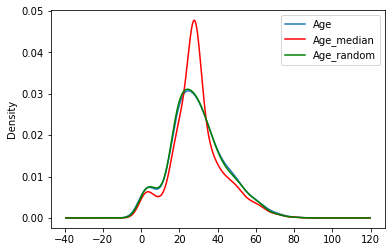

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111)
df["Age"].plot(kind='kde',ax=ax)
df["Age_median"].plot(kind="kde",ax=ax,color="red")
df["Age_random"].plot(kind="kde",ax=ax,color="green")
plt.legend(["Age","Age_median","Age_random"]);

# Advantages
1. Easy to Implement
2. There is less Distortion in variance

# Disadvantages
1. In every Situation Randomness wont work

### 3. Capturing NAN values with a new feature

It works well when the data are not missing completely at random

In [1]:
df = pd.read_csv("train.csv",usecols=["Age","Fare","Survived"])
df.head()

NameError: name 'pd' is not defined

In [ ]:
df["Age_NAN"] = np.where(df["Age"].isnull(),1,0)

In [2]:
df.head()

NameError: name 'df' is not defined

### Advantages
1. Easy to Implement
2. It Captures the Importance of missing values

### Disadvantages
1. Creating Additional Features (Curse of Dimensionality)


## 4. End of Distribution Imputation 

It works well when the data is missing completely at random

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv("train.csv",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


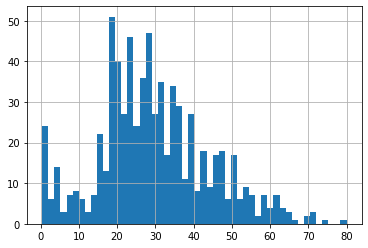

In [6]:
df.Age.hist(bins=50);

In [7]:
df.Age.mean()

29.69911764705882

In [8]:
df.Age.std()

14.526497332334044

In [9]:
extreme = df.Age.mean()+3*df.Age.std()

C:\Users\Altaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


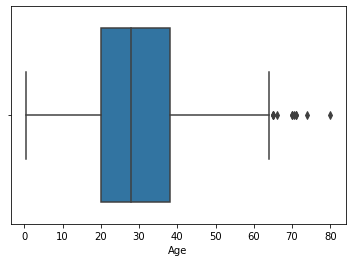

In [10]:
import seaborn as sns

sns.boxplot("Age",data=df);

In [11]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [12]:
impute_nan(df,"Age",df.Age.median(),extreme)

In [13]:
df.head(50)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


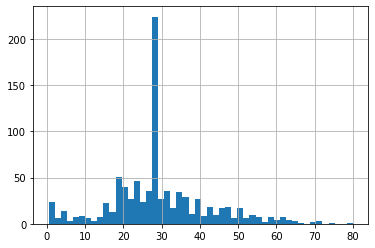

In [14]:
df["Age"].hist(bins=50);

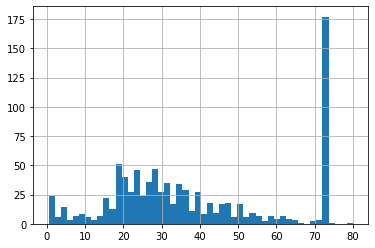

In [15]:
df["Age_end_distribution"].hist(bins=50);

C:\Users\Altaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


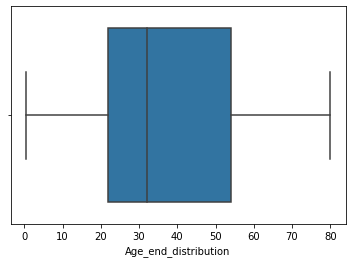

In [16]:
sns.boxplot("Age_end_distribution",data=df);

In [17]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


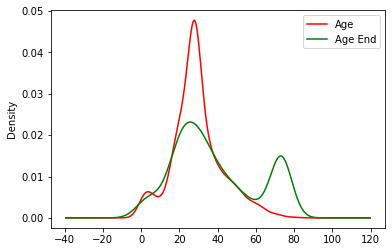

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
df["Age"].plot(kind="kde",label="Age",color="red")
df["Age_end_distribution"].plot(kind="kde",label="Age_end",color="green")
plt.legend(["Age","Age End"])
plt.show()

# Arbitrary Value Imputation

It Consist of replacing NAN by an arbitrary values.
This technique was derived from kaggle competition.

In [20]:
import pandas as pd

In [21]:
df = pd.read_csv("train.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [24]:
def impute_nan(df,variable):
    df[variable+"_hundred"] = df[variable].fillna(100)
    df[variable+"_zeros"] = df[variable].fillna(0)

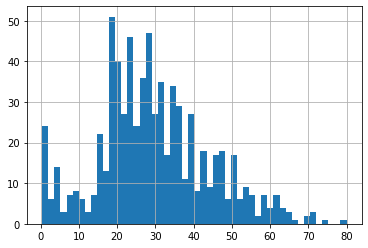

In [23]:
df["Age"].hist(bins=50);

In [25]:
impute_nan(df,"Age")

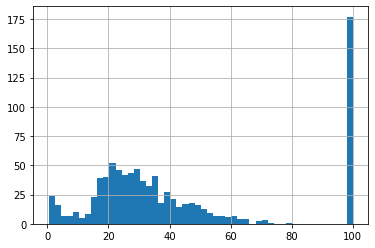

In [27]:
df["Age_hundred"].hist(bins=50);

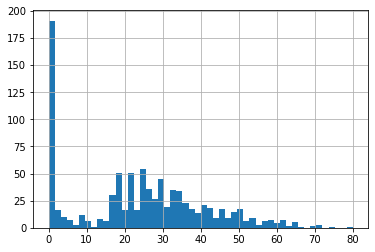

In [29]:
df["Age_zeros"].hist(bins=50);

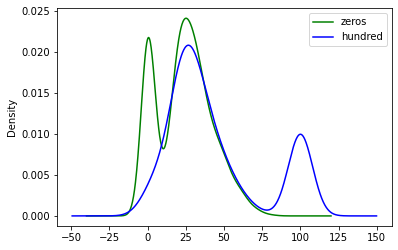

In [30]:
df["Age_zeros"].plot(kind="kde",color="green")
df["Age_hundred"].plot(kind="kde",color="blue")
plt.legend(["zeros","hundred"])
plt.show()

### Arbitrary values
#### 1. IT should be more frequent present
### Advantages

-Easy to implement
-Captures the importnace of missings if there is one

### Disadvantages

-Disorts the original distribution of the variable
-If missing is not important. It may mask thr predictive power of the original variable by distribution
-Hard to decide which value to use

#### Arbitrary values
#### How to Handle Categorical missing values

#### Frequent category Imputation

#### we can also MODE in this example

In [32]:
df = pd.read_csv("housingprice_train.csv",usecols=["BsmtQual","FireplaceQu","GarageType","SalePrice"])

In [33]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [42]:
df.isnull().sum().sort_values(ascending=False)

FireplaceQu    690
GarageType      81
BsmtQual        37
SalePrice        0
dtype: int64

In [43]:
df.isnull().mean().sort_values(ascending=False)

FireplaceQu    0.472603
GarageType     0.055479
BsmtQual       0.025342
SalePrice      0.000000
dtype: float64

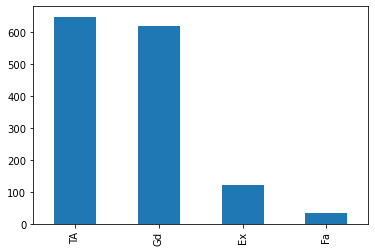

In [48]:
df['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar();

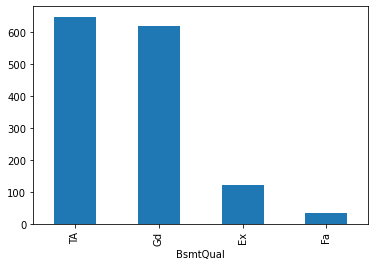

In [49]:
df.groupby(["BsmtQual"])["BsmtQual"].count().sort_values(ascending=False).plot.bar();

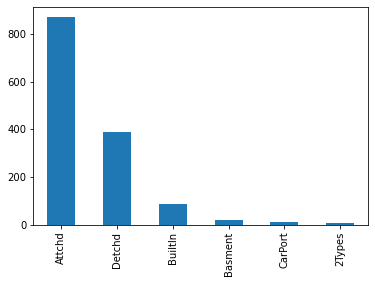

In [50]:
df["GarageType"].value_counts().plot.bar();

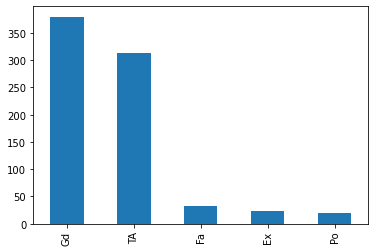

In [52]:
df["FireplaceQu"].value_counts().plot.bar();

In [54]:
df["GarageType"].value_counts().sort_values(ascending=False).index[0]

'Attchd'

In [55]:
def impute_nan(df,variable):
    most_frequent_category = df[variable].value_counts().sort_values(ascending=False).index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [57]:
for features in ["BsmtQual","FireplaceQu","GarageType"]:
    impute_nan(df,features)

In [58]:
df.isna().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [59]:
df["BsmtQual"].value_counts()

TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [64]:
df["BsmtQual"].value_counts().values/len(df)

array([0.46986301, 0.42328767, 0.08287671, 0.0239726 ])

### Advantages
1. Easy to implement
2. Faster way to implement

### Disadvantages
1. Sine we are using most frequent label, it may be represented more important to model
2. Distorts the relationship of the most frequent label

#### Suppose you have more frequent categories, we just replace NAN with a new category

In [65]:
df = pd.read_csv("housingprice_train.csv",usecols=["BsmtQual","FireplaceQu","GarageType","SalePrice"])

In [67]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [68]:
def impute_nan(df,variable):
    df[variable+"+newvar"] = np.where(df[variable].isnull(),"Missing",df[variable])

In [71]:
for feature in ["BsmtQual","FireplaceQu","GarageType"]:
    impute_nan(df,feature)

In [72]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual+newvar,FireplaceQu+newvar,GarageType+newvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [73]:
df.drop(["BsmtQual","FireplaceQu","GarageType"],axis=1)

,SalePrice,BsmtQual+newvar,FireplaceQu+newvar,GarageType+newvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,Missing,Attchd
